## Comprehensive Report on Mamba

### Introduction

In the realm of machine learning, the analysis and interpretation of sequential data, which unfolds over time, stand as fundamental tasks. Traditional sequential models, such as Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Gated Recurrent Units (GRUs), have long served as the backbone of sequence modeling. These models have enabled a plethora of applications including language translation, time-series forecasting, and speech recognition. However, they encounter notable challenges when it comes to capturing long-range dependencies within data and scaling efficiently, particularly with large datasets.

Transformers, with their self-attention mechanisms, have ushered in a new era in sequence modeling, demonstrating remarkable performance across various tasks. Despite their transformative impact, Transformers exhibit limitations, notably their quadratic time complexity concerning sequence length, which poses computational challenges, especially with extensive sequences.

Enter Mamba, a novel architecture grounded in Selective State Spaces (SSM), which represents a significant leap forward in sequence modeling. By selectively propagating or discarding information along the sequence length dimension, Mamba addresses the limitations of both traditional sequential models and Transformers. Leveraging SSMs, Mamba not only overcomes computational challenges but also offers improved efficiency and scalability compared to existing models.

This report aims to provide a comprehensive exploration of the Mamba architecture, its underlying principles, and mechanisms. It will conduct a comparative analysis with traditional sequential models and Transformers to highlight the advantages and limitations of Mamba. Additionally, the report will delve into the diverse applications of Mamba across various domains, including natural language processing, with a special look at Speech to Text applications.

### Overview of Sequence Modeling Architectures

#### Recurrent Neural Networks (RNNs)

RNNs are designed to handle sequential data by maintaining a hidden state that evolves over time. The hidden state at time $t$ is given by:

$$
 h_t = \sigma(W_h h_{t-1} + W_x x_t) 
$$

where $\sigma$ is a non-linear activation function, $W_h$ and $W_x$ are weight matrices, $h_{t-1}$ is the hidden state from the previous time step, and $x_t$ is the input at time $t$. Despite their ability to model temporal dependencies, RNNs struggle with vanishing and exploding gradients, making it difficult to capture long-range dependencies effectively.

#### Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)

LSTMs and GRUs are variants of RNNs designed to address the vanishing gradient problem. LSTMs introduce memory cells and gating mechanisms, which control the flow of information. The LSTM equations are:

$$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)$$
$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)$$
$$o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)$$
$$\tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)$$
$$c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$$
$$h_t = o_t \odot \tanh(c_t)$$

where $i_t$, $f_t$, and $o_t$ are input, forget, and output gates, respectively. $\tilde{c}_t$ is the candidate cell state, $c_t$ is the cell state, and $ \odot$ denotes element-wise multiplication.

#### Transformers

Transformers introduced the self-attention mechanism, allowing the model to focus on different parts of the input sequence. The core component is the attention mechanism, defined as:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

where $Q$ (queries), $K$ (keys), and $V$ (values) are projections of the input sequence, and $d_k$ is the dimensionality of the queries and keys. The Transformer architecture, composed of multiple layers of self-attention and feed-forward networks, achieves impressive results in various NLP tasks but suffers from quadratic time complexity $O(n^2)$ in both training and inference.

### State Space Models (SSMs)

State Space Models provide a mathematical framework for modeling dynamic systems. In sequence modeling, SSMs can be used to capture the evolution of sequences through state vectors and linear transformations. The general form of a discrete-time SSM is:

$$s_{t+1} = A s_t + B x_t$$
$$y_t = C s_t + D x_t$$

where $s_t$ is the state vector at time $t$, $x_t$ is the input, $y_t$ is the output, and $A$, $B$, $C$, and $D$ are matrices that define the system dynamics. Traditional SSMs are limited by their inability to selectively focus on relevant information, reducing their effectiveness compared to modern architectures.

### Mamba: Selective State Spaces Model

Mamba introduces Selective State Spaces (SSM), which dynamically adapt to the context, offering a balance between efficiency and effectiveness.

#### Core Components of Mamba

1. **Selective State Spaces (SSM)**: Mamba's key innovation lies in its ability to dynamically adapt the state space parameters based on the context. This selectivity allows the model to focus on relevant information and discard irrelevant data, enhancing efficiency and effectiveness.
2. **Unified Architecture**: Mamba simplifies the architecture by replacing the complex attention and MLP blocks of Transformers with a single, unified SSM block, reducing computational complexity and improving inference speed.
3. **Hardware-Aware Parallelism**: Mamba's design includes hardware-aware parallel algorithms that enhance performance, particularly in recurrent modes.

#### Mathematical Formulation

Mamba's architecture can be described by the following equations:

$$s_{t+1} = A(x_t) s_t + B(x_t) x_t$$
$$y_t = C(x_t) s_t + D(x_t) x_t$$

where $A(x_t)$, $B(x_t)$, $C(x_t)$, and $D(x_t)$ are context-dependent matrices, adapting dynamically to the input $x_t$. This selectivity allows Mamba to retain relevant information efficiently, improving its ability to handle long-range dependencies and large context windows.

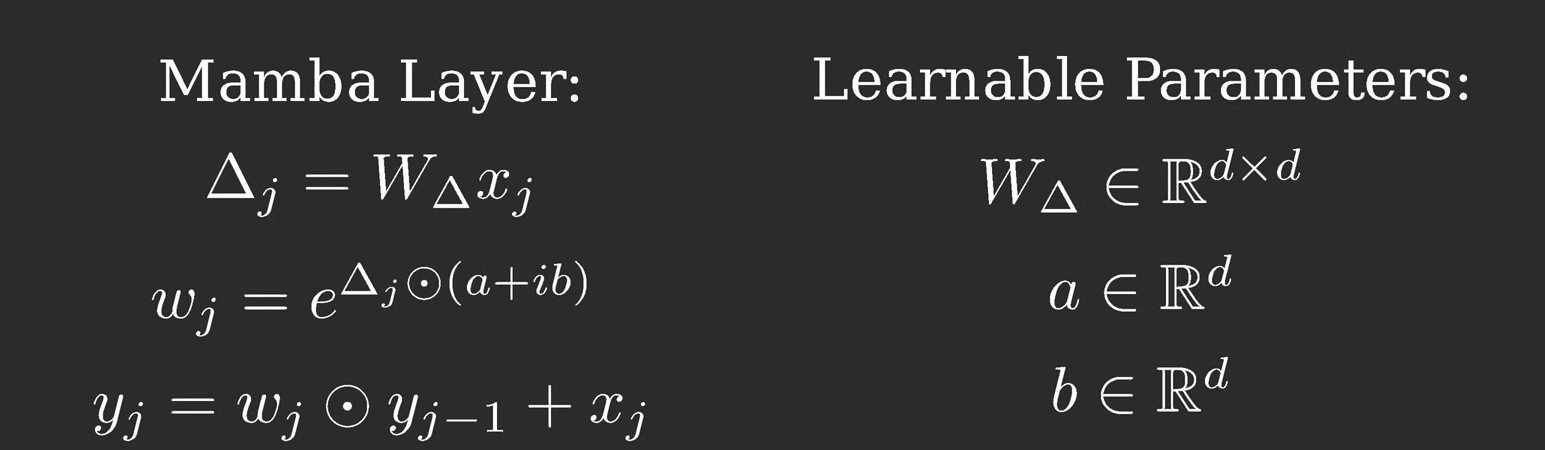

### Detailed Explanation of the Mamba Research Paper

The Mamba research paper, "Mamba: Linear-Time Sequence Modeling with Selective State Spaces," provides a comprehensive analysis of the architecture, its components, and its performance.

#### Architecture Design

The paper introduces the Selective State Space (SSM) model, which combines the strengths of traditional SSMs with context-aware mechanisms. The selective mechanism allows the model to dynamically adapt its state space parameters based on the input, enhancing efficiency and effectiveness.

#### Theoretical Foundations

The authors provide a rigorous theoretical analysis, demonstrating that Mamba achieves linear time complexity for training and constant time complexity for inference. This efficiency is achieved through the selective state space mechanism, which dynamically adjusts the model's parameters based on the context.

#### Empirical Results

Extensive experimental results show that Mamba outperforms Transformers in various sequence modeling tasks, particularly in handling long sequences and large context windows. The Mamba-3B model, for instance, surpasses Transformers twice its size in language modeling tasks.

#### Applications

The paper highlights potential applications of Mamba, including language modeling, audio processing, and genomics. Mamba's ability to handle long sequences efficiently makes it suitable for a wide range of tasks, from speech recognition to genetic data analysis.

### Advantages of Mamba Over Transformers

#### Long-Range Dependency and Huge Context Windows

Mamba's selective state space mechanism allows it to efficiently handle long-range dependencies by dynamically adapting its parameters to focus on relevant information. This approach mitigates the computational overhead associated with Transformers, which require quadratic time complexity to process long sequences. Mamba's linear time complexity makes it more scalable and efficient for tasks involving large context windows.

### Hybrid Architectures: Jamba

Jamba is a hybrid architecture that combines Mamba layers with Transformer layers and Mixture of Experts (MoE) layers to achieve better performance. This approach leverages the strengths of each component:

1. **Mamba Layers**: Provide efficient processing of long sequences through selective state spaces.
2. **Transformer Layers**: Enhance the model's ability to capture complex dependencies through attention mechanisms.
3. **MoE Layers**: Improve scalability and performance by dynamically selecting the most relevant experts for each token.

Jamba demonstrates that integrating Mamba with other architectures can lead to significant improvements in sequence modeling tasks.

### Annotated S4: A Detailed Examination

The Annotated S4 provides a comprehensive overview of the S4 architecture, an extension of Mamba. Key components include:

1. **State Space Model (SSM)**: The core of the architecture, capturing the dynamics of sequences through linear transformations.
2. **Fourier Transform**: Utilized to efficiently compute the state updates, reducing computational complexity.
3. **Selective Mechanisms**: Context-aware mechanisms that dynamically adapt the model's parameters based on the input sequence.

#### Mathematical Formulation

The S4 architecture extends Mamba by incorporating Fourier Transforms for efficient computation. The state update equation is:

$$s_{t+1} = F^{-1}( \text{FFT}(A(x_t) \circ F(s_t)) + B(x_t) x_t )$$

where $F$ and $F^{-1}$ denote the Fourier Transform and its inverse, and $\circ$ represents element-wise multiplication. This formulation allows for efficient computation of state updates, enhancing the scalability of the model.

### Mamba in Speech-to-Text Applications

Mamba's architecture is particularly well-suited for speech-to-text applications, which require efficient processing of long audio sequences. By leveraging selective state spaces, Mamba can dynamically focus on relevant segments of the audio input, improving accuracy and reducing computational overhead. The model's ability to handle long-range dependencies makes it ideal for capturing context and nuances in speech, leading to more accurate transcriptions.

<!-- #### Workflow for Speech-to-Text

1. **Preprocessing**: Audio signals are preprocessed to extract features such as Mel-Frequency Cepstral Coefficients (MFCCs).
2. **Feature Extraction**: The -->

